    Matrix Chain ID  Upper Bound on Matrix Size  Sequential Time  Optimal Time
0                 2                          20         0.003694      0.000260
1                 3                          30         0.000049      0.000208
2                 4                          40         0.000058      0.000200
3                 5                          50         0.000051      0.000207
4                 6                          60         0.000273      0.000206
5                 7                          70         0.000077      0.000198
6                 8                          80         0.000211      0.000204
7                 9                          90         0.001418      0.000217
8                10                         100         0.000139      0.000212
9                11                         110         0.000486      0.000207
10               12                         120         0.001046      0.000210
11               13                         130     

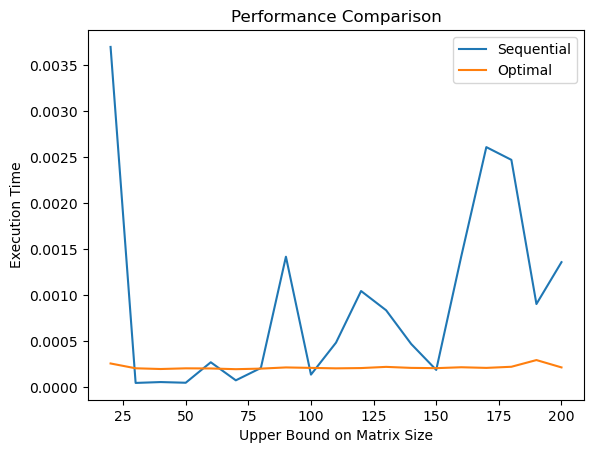

In [5]:
#
# Sources used: GitHub Copilot (github.com/features/copilot), stack overflow (stackoverflow.com)
#
#
#
#


import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

# 1: Generate Matrix Chains
def generate_matrix_chain():
    chains = []
    
    for j in range(2, 21):
        dimensions = [np.random.randint(10, j * 10) for _ in range(11)]
        matrices = [np.random.rand(dimensions[i], dimensions[i+1]) for i in range(10)]
        chains.append(matrices)
    
    return chains

# 2: Implement Algorithm-1
def matrix_multiply(A, B):
    
    return np.dot(A, B)

# 3: Implement MATRIX-CHAIN-ORDER Algorithm
def matrix_chain_order(p):
    n = len(p) - 1  # Number of matrices in chain
    m = np.zeros((n, n))  # Table to store minimum number of scalar multiplications
    s = np.zeros((n, n), dtype=int)  # Table to store split points

    
    for l in range(2, n + 1):  # Length of chain
        
        for i in range(n - l + 1):
            j = i + l - 1
            m[i, j] = float('inf')
            
            for k in range(i, j):
                q = m[i, k] + m[k + 1, j] + p[i] * p[k + 1] * p[j + 1]
                
                if q < m[i, j]:
                    m[i, j] = q
                    s[i, j] = k + 1

    return m, s

# 4: Develop Chain-Matrix-Multiply Algorithm
def chain_matrix_multiply(p, s, i, j):
    
    if i == j:
        
        return p[i-1][0], p[i][1]
    
    else:
        A = chain_matrix_multiply(p, s, i, s[i][j])
        B = chain_matrix_multiply(p, s, s[i][j]+1, j)
        C = matrix_multiply(A, B)
        
        return C

# 5: Measure Execution Time

#Got help from copilot implementing the calculation of optimal time, based on sequential time

def measure_execution_time(matrix_chain):
    
    # Measure sequential multiplication time
    
    start_time = time.time()
    result = matrix_chain[0]
    
    for i in range(1, len(matrix_chain)):
        result = matrix_multiply(result, matrix_chain[i])
    sequential_time = time.time() - start_time

    # Measure optimal order multiplication time
    
    start_time = time.time()
    p = [matrix.shape[0] for matrix in matrix_chain] + [matrix_chain[-1].shape[1]]
    m, s = matrix_chain_order(p)
    optimal_time = time.time() - start_time

    return sequential_time, optimal_time

# 6: Performance Analysis

# got help from copilot Making sure I was creating a data frame that was the correct size, 
# and applying the correct modifications to the code to account for multiple different types of arrays used

def performance_analysis():
    chains = generate_matrix_chain()
    data = []
    
    for idx, chain in enumerate(chains, start=2):
        upper_bound = idx * 10
        sequential_time, optimal_time = measure_execution_time(chain)
        data.append([idx, upper_bound, sequential_time, optimal_time])
    
    df = pd.DataFrame(data, columns=['Matrix Chain ID', 'Upper Bound on Matrix Size', 'Sequential Time', 'Optimal Time'])
    
    return df

# 7: Visualization
def visualize_performance(df):
    
    plt.plot(df['Upper Bound on Matrix Size'], df['Sequential Time'], label='Sequential')
    plt.plot(df['Upper Bound on Matrix Size'], df['Optimal Time'], label='Optimal')
    plt.xlabel('Upper Bound on Matrix Size')
    plt.ylabel('Execution Time')
    plt.title('Performance Comparison')
    plt.legend()
    plt.show()

# Run performance analysis
df = performance_analysis()
print(df)

# Visualize the performance
visualize_performance(df)
